In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
df = pd.read_csv('Breast_Cancer.csv')

Data Characterization
##Data Overview
first text based then visualization

In [4]:
df.shape

(4024, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
#Statistical Summary
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Visualizations
interesting thing is pair plot by seaborn
sns.pairplot()
try decision tree to show importance of features, for all data & features

In [7]:
column_names = df.columns
column_names = [name.replace(' ', '_') for name in column_names]
column_names = [name[:-1] + name[-1:].replace('_', '') if name.endswith('_') else name for name in column_names]
df.columns = column_names

In [8]:
#function for pretty histogram
def pretty_hist(feature):
    fig = px.histogram(df, x=feature, title=f'Distribution of {feature}', color_discrete_sequence=['lightgreen'], barmode= 'overlay', opacity=0.7)
    fig.update_traces(marker_line_width=1.5, marker_line_color="black")
    fig.update_layout(title={'text': f'Distribution of {feature}', 'font': {'size': 24, 'family': 'Arial', 'color': 'black'}}, width=500,
        height=400)
    fig.show()

In [9]:
#function for pretty bar chart
def pretty_bar(feature):
    value_counts = df[feature].value_counts().reset_index()
    value_counts.columns = ['x_values', 'count']
    fig = px.bar(value_counts, x='x_values', y='count', title="Bar Chart")
    fig.update_layout(
        xaxis_title=f'{feature} Title',
        yaxis_title="Count",
        title_font=dict(size=20, family="Arial", color="black"),
        width=500,
        height=400)
    fig.show()

In [10]:
#function for pretty box plot
def pretty_box(feature):
    value_counts = df[feature].value_counts().reset_index()
    value_counts.columns = ['x_values', 'count']

# Create the bar chart using Plotly Express
    fig = px.bar(value_counts, x='x_values', y='count', title="Bar Chart")
    fig.update_layout(
    xaxis_title='{feature}',
    yaxis_title="Count",
    title_font=dict(size=20, family="Arial", color="black"),
    width=500, height=400)
    fig.show()

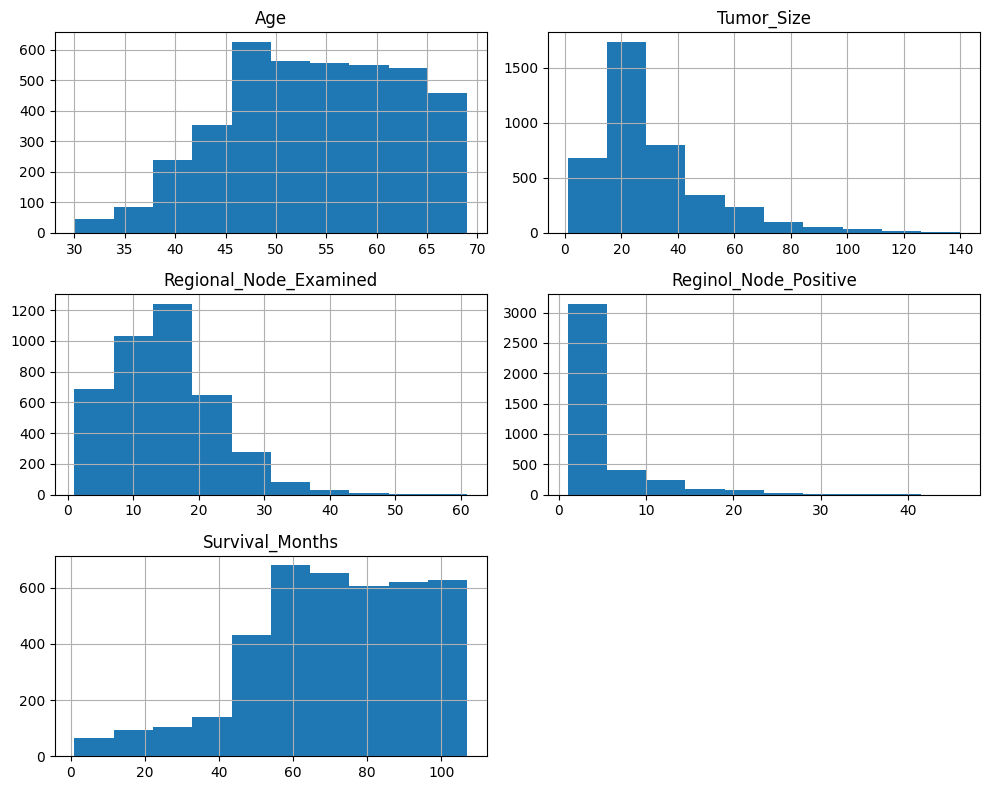

In [11]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [12]:
pretty_hist('Age')
pretty_hist('Tumor_Size')
pretty_hist('Regional_Node_Examined')
pretty_hist('Reginol_Node_Positive')
pretty_hist('Survival_Months')

In [13]:
object_columns = df.select_dtypes(include=['object'])
object_columns.columns


Index(['Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage',
       'differentiate', 'Grade', 'A_Stage', 'Estrogen_Status',
       'Progesterone_Status', 'Status'],
      dtype='object')

In [14]:
for obj in range(len(object_columns)):
    object_col_name= object_columns.columns[obj]
    pretty_bar(object_col_name)

IndexError: index 11 is out of bounds for axis 0 with size 11

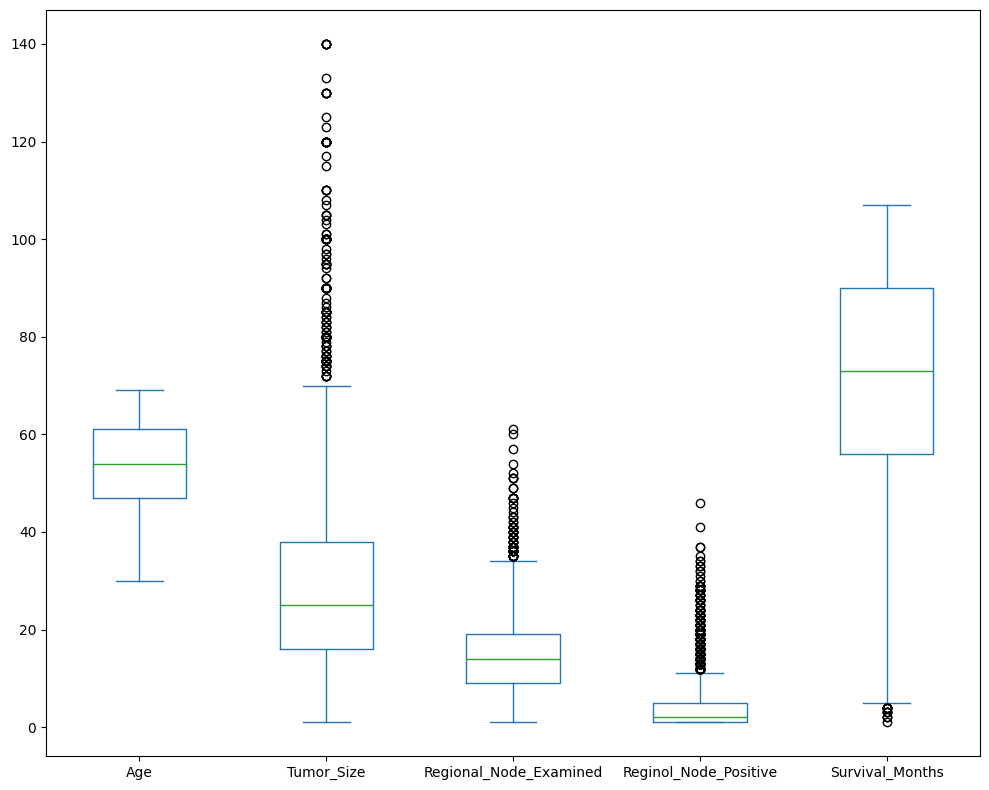

In [ ]:
df.plot(kind='box', figsize=(10, 8))
plt.tight_layout()
plt.show()

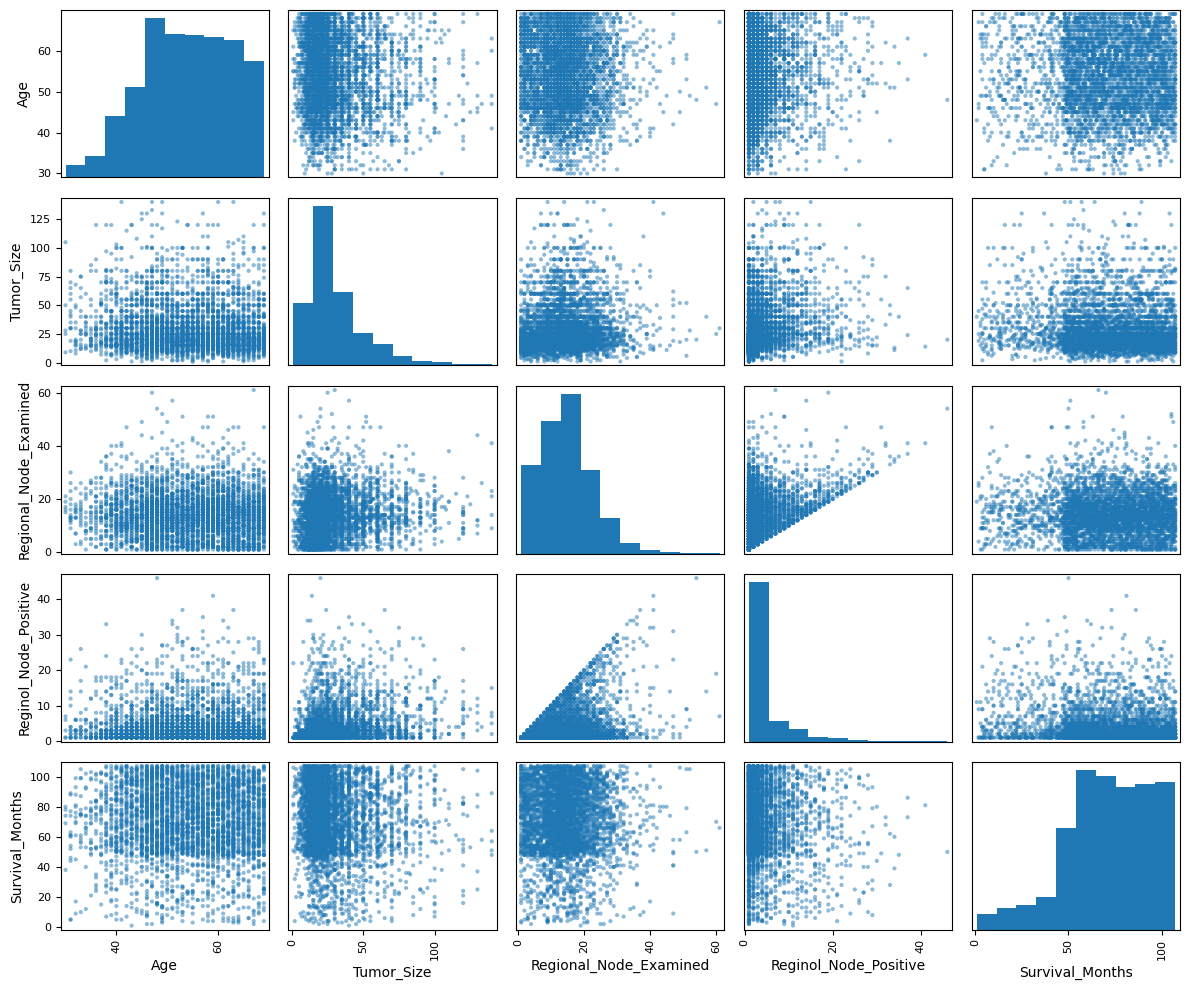

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(12, 10))
plt.tight_layout()
#plt.show()
plt.savefig('scatter_matrix.png')

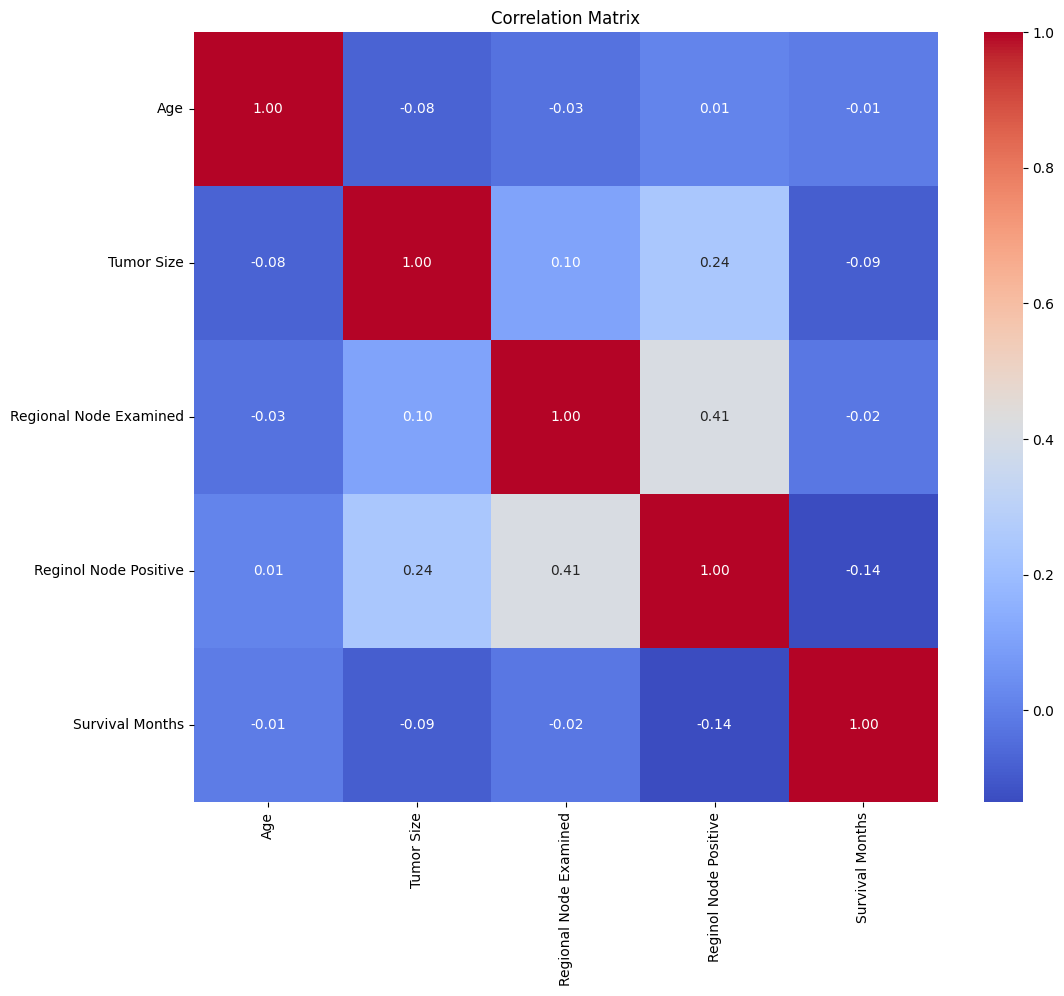

In [15]:
df_columns = df.columns
for s in range(len(df_columns)):
    column_name= df_columns[s]
    print(df[column_name].unique())

[68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30]
['White' 'Black' 'Other']
['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
['T1' 'T2' 'T3' 'T4']
['N1' 'N2' 'N3']
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['3' '2' '1' ' anaplastic; Grade IV']
['Regional' 'Distant']
[  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  67]
['Positive' 'Negative']
['Positive' 'Negative']
[24 14  2  3 18 11  9 20 21 13 23 16  1 22 15  4 26 31 25 10  5  6 19

In [16]:
for s in range(len(df_columns)):
    column_name= df_columns[s]
    print(df[column_name].value_counts())

Age
46    163
49    162
47    161
53    155
55    154
63    153
62    149
51    148
59    147
50    144
57    144
61    143
60    140
48    140
56    132
54    128
65    122
58    120
67    119
66    119
52    118
64    116
68    111
69    108
45    102
43     92
42     82
44     79
40     72
41     71
39     52
38     45
37     28
36     24
35     20
33     15
31     14
34     14
32     13
30      5
Name: count, dtype: int64
Race
White    3413
Other     320
Black     291
Name: count, dtype: int64
Marital_Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
T_Stage
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64
N_Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64
6th_Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undi

Outlier Detection & Feature Distribution

Outliers can be identified with the above boxplots. One can see that there are a significant number of outliers at Tumor Size, Regional Node Examined and Regional Node Positive. Some outliers can also be seen in Survival Months

In [17]:
# Define outlier detection criteria (for example, z-score)
threshold = 2  # Adjust as needed

# Calculate z-score for the column
mean = df['Regional_Node_Examined'].mean()
std_dev = df['Regional_Node_Examined'].std()
df['z_score'] = (df['Regional_Node_Examined'] - mean) / std_dev

# Filter rows where z-score exceeds the threshold
outliers_df = df[abs(df['z_score']) > threshold]

# Display rows containing outliers
print(outliers_df)

      Age   Race Marital_Status T_Stage N_Stage 6th_Stage  \
25     63  White        Married      T2      N3      IIIC   
57     50  White        Married      T1      N1       IIA   
100    38  White        Single       T3      N3      IIIC   
112    46  White        Single       T2      N3      IIIC   
178    52  White        Married      T2      N3      IIIC   
...   ...    ...            ...     ...     ...       ...   
3942   44  White        Married      T2      N3      IIIC   
3950   47  White        Married      T2      N3      IIIC   
3957   39  White        Married      T1      N1       IIA   
3978   67  White        Married      T1      N1       IIA   
3990   61  White        Married      T2      N1       IIB   

                  differentiate Grade   A_Stage  Tumor_Size Estrogen_Status  \
25    Moderately differentiated     2  Regional          22        Positive   
57    Moderately differentiated     2  Regional          18        Positive   
100   Moderately differentiate

In [ ]:
# Define outlier detection criteria (for example, z-score)
threshold = 2  # Adjust as needed

# Calculate z-score for the column
mean = df['Survival_Months'].mean()
std_dev = df['Survival_Months'].std()
df['z_score'] = (df['Survival_Months'] - mean) / std_dev

# Filter rows where z-score exceeds the threshold
outliers_df = df[abs(df['z_score']) > threshold]

# Display rows containing outliers
print(outliers_df)

      Age   Race Marital_Status T_Stage N_Stage 6th_Stage  \
7      40  White        Married      T2      N1       IIB   
71     64  White        Married      T2      N3      IIIC   
96     50  White       Divorced      T2      N1       IIB   
102    39  White        Married      T2      N1       IIB   
106    54  White        Married      T2      N1       IIB   
...   ...    ...            ...     ...     ...       ...   
3838   66  White        Married      T4      N3      IIIC   
3926   68  White        Married      T1      N1       IIA   
3969   66  Black        Widowed      T1      N1       IIA   
4001   55  White        Married      T2      N1       IIB   
4017   46  White        Married      T2      N1       IIB   

                  differentiate Grade   A_Stage  Tumor_Size Estrogen_Status  \
7     Moderately differentiated     2  Regional          30        Positive   
71        Poorly differentiated     3  Regional          34        Positive   
96    Moderately differentiate

In [ ]:
# Define outlier detection criteria (for example, z-score)
threshold = 2  # Adjust as needed

# Calculate z-score for the column
mean = df['Reginol_Node_Positive'].mean()
std_dev = df['Reginol_Node_Positive'].std()
df['z_score'] = (df['Reginol_Node_Positive'] - mean) / std_dev

# Filter rows where z-score exceeds the threshold
outliers_df = df[abs(df['z_score']) > threshold]

# Display rows containing outliers
print(outliers_df)

      Age   Race Marital_Status T_Stage N_Stage 6th_Stage  \
8      40  White       Divorced      T4      N3      IIIC   
24     62  White        Married      T1      N3      IIIC   
25     63  White        Married      T2      N3      IIIC   
26     48  White        Married      T2      N3      IIIC   
66     31  White        Married      T3      N3      IIIC   
...   ...    ...            ...     ...     ...       ...   
3942   44  White        Married      T2      N3      IIIC   
3950   47  White        Married      T2      N3      IIIC   
3960   58  Other        Single       T2      N3      IIIC   
3985   51  White        Married      T4      N3      IIIC   
3992   42  Black        Married      T2      N3      IIIC   

                  differentiate Grade   A_Stage  Tumor_Size Estrogen_Status  \
8         Poorly differentiated     3  Regional         103        Positive   
24        Poorly differentiated     3  Regional          20        Positive   
25    Moderately differentiate

In [ ]:
# Define outlier detection criteria (for example, z-score)
threshold = 2  # Adjust as needed

# Calculate z-score for the column
mean = df['Tumor_Size'].mean()
std_dev = df['Tumor_Size'].std()
df['z_score'] = (df['Tumor_Size'] - mean) / std_dev

# Filter rows where z-score exceeds the threshold
outliers_df = df[abs(df['z_score']) > threshold]

# Display rows containing outliers
print(outliers_df)

      Age   Race Marital_Status T_Stage N_Stage 6th_Stage  \
8      40  White       Divorced      T4      N3      IIIC   
52     60  Black        Married      T3      N1      IIIA   
53     63  White        Married      T3      N1      IIIA   
63     59  White        Married      T3      N1      IIIA   
70     49  White        Married      T3      N2      IIIA   
...   ...    ...            ...     ...     ...       ...   
3930   38  Black        Single       T3      N3      IIIC   
3965   47  White        Married      T3      N2      IIIA   
3991   51  White        Married      T3      N3      IIIC   
4009   53  White       Divorced      T3      N1      IIIA   
4012   51  White        Married      T3      N3      IIIC   

                  differentiate Grade   A_Stage  Tumor_Size Estrogen_Status  \
8         Poorly differentiated     3  Regional         103        Positive   
52        Poorly differentiated     3  Regional         120        Positive   
53          Well differentiate

In [ ]:
#each column
# Age                     4024 non-null   int64 
#Race                    4024 non-null   object
#Marital Status          4024 non-null   object
#T Stage                 4024 non-null   object
#N Stage                 4024 non-null   object
#6th Stage               4024 non-null   object
#differentiate           4024 non-null   object
#Grade                   4024 non-null   object
#A Stage                 4024 non-null   object
#Tumor Size              4024 non-null   int64 
# Estrogen Status         4024 non-null   object
#  Progesterone Status     4024 non-null   object
#  Regional Node Examined  4024 non-null   int64 
# Reginol Node Positive   4024 non-null   int64 
# Survival Months
# Status   

df["Reginol_Node_Positive"].unique()

array([ 1,  5,  7,  2, 18, 12,  3, 14, 22, 17, 23,  4, 10,  6,  9,  8, 20,
       16, 13, 11, 24, 27, 21, 26, 15, 28, 19, 29, 31, 46, 33, 37, 30, 35,
       25, 32, 41, 34])

In [ ]:
df["Survival_Months"].unique()

array([ 60,  62,  75,  84,  50,  89,  54,  14,  70,  92,  64,  56,  38,
        49, 105, 107,  77,  81,  78, 102,  98,  82,  86,  52,  90,  31,
        37, 103,  42,  61,  63,  39,  59,  71,  74,  73,  91, 106,  80,
        44,  85,  79, 104,  12,  95,  55, 101,  65,  72,  57,  87,  40,
        25,   8,  53,  58,  24,  66,  69,  93,  94, 100,  96,  41,  67,
        51,  13,  11,  47,  23,  45,  68,  76,  15,  16,  99,   7,  48,
        88,  34,  97,  83,  17,   3,  22,  30,   6,  32,   9,   5,  10,
        19,  18,  35,  27,  36,   4,  29,  33,  26,  20,  28,  43,   1,
        46,  21,   2])

In [ ]:
df.groupby(['Status', 'Survival_Months']).size().reset_index(name='count')    

,Status,Survival_Months,count
0,Alive,1,1
1,Alive,2,1
2,Alive,3,2
3,Alive,4,1
4,Alive,5,2
...,...,...,...
194,Dead,98,1
195,Dead,99,1
196,Dead,100,4
197,Dead,101,1


In [ ]:
counts_by_status = df.groupby("Status")["Survival_Months"].value_counts()
counts_equal_to_1 = counts_by_status[counts_by_status == 1]
counts_equal_to_1

Status  Survival_Months
Alive   1                  1
        2                  1
        4                  1
        7                  1
        11                 1
        13                 1
        17                 1
        21                 1
        26                 1
        28                 1
        30                 1
        43                 1
Dead    85                 1
        92                 1
        94                 1
        98                 1
        99                 1
        101                1
        102                1
Name: count, dtype: int64

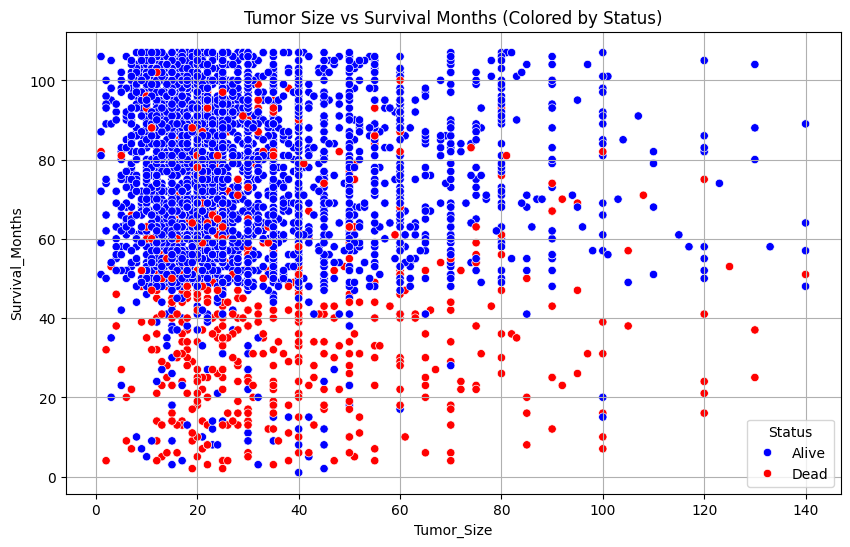

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tumor_Size', y='Survival_Months', hue='Status', data=df, palette={'Alive': 'blue', 'Dead': 'red'})

plt.xlabel('Tumor_Size')
plt.ylabel('Survival_Months')
plt.title('Tumor Size vs Survival Months (Colored by Status)')
plt.legend(title='Status')
plt.grid(True)
plt.show()

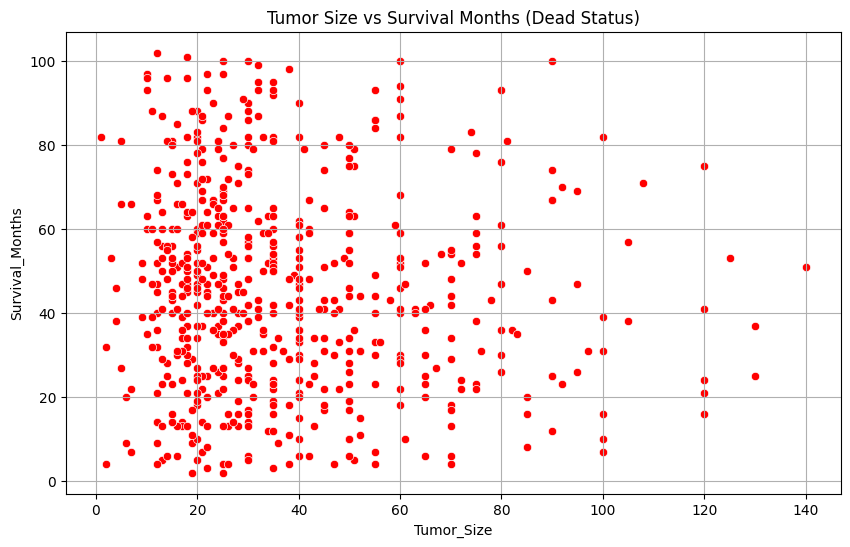

In [ ]:
dead_df = df[df['Status'] == 'Dead']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tumor_Size', y='Survival_Months', data=dead_df, color='red')

plt.xlabel('Tumor_Size')
plt.ylabel('Survival_Months')
plt.title('Tumor Size vs Survival Months (Dead Status)')
plt.grid(True)
plt.show()

In [ ]:
df["Survival_Months"].max()
df["Survival_Months"].value_counts()

Survival_Months
69     81
63     73
56     73
102    73
98     72
       ..
7       5
3       4
11      4
2       3
1       1
Name: count, Length: 107, dtype: int64

# Feature Distribution, 

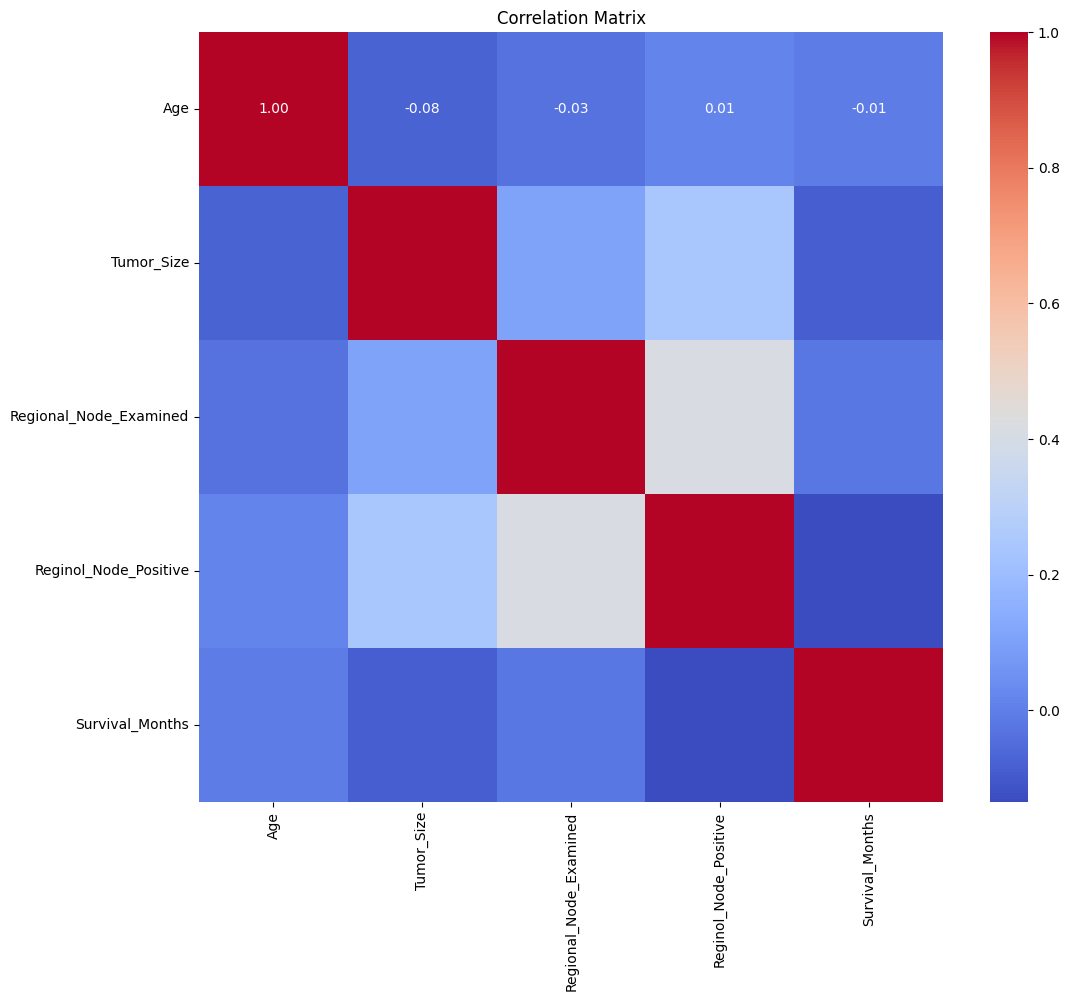

In [18]:
df.drop(columns=['z_score'], inplace=True)
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


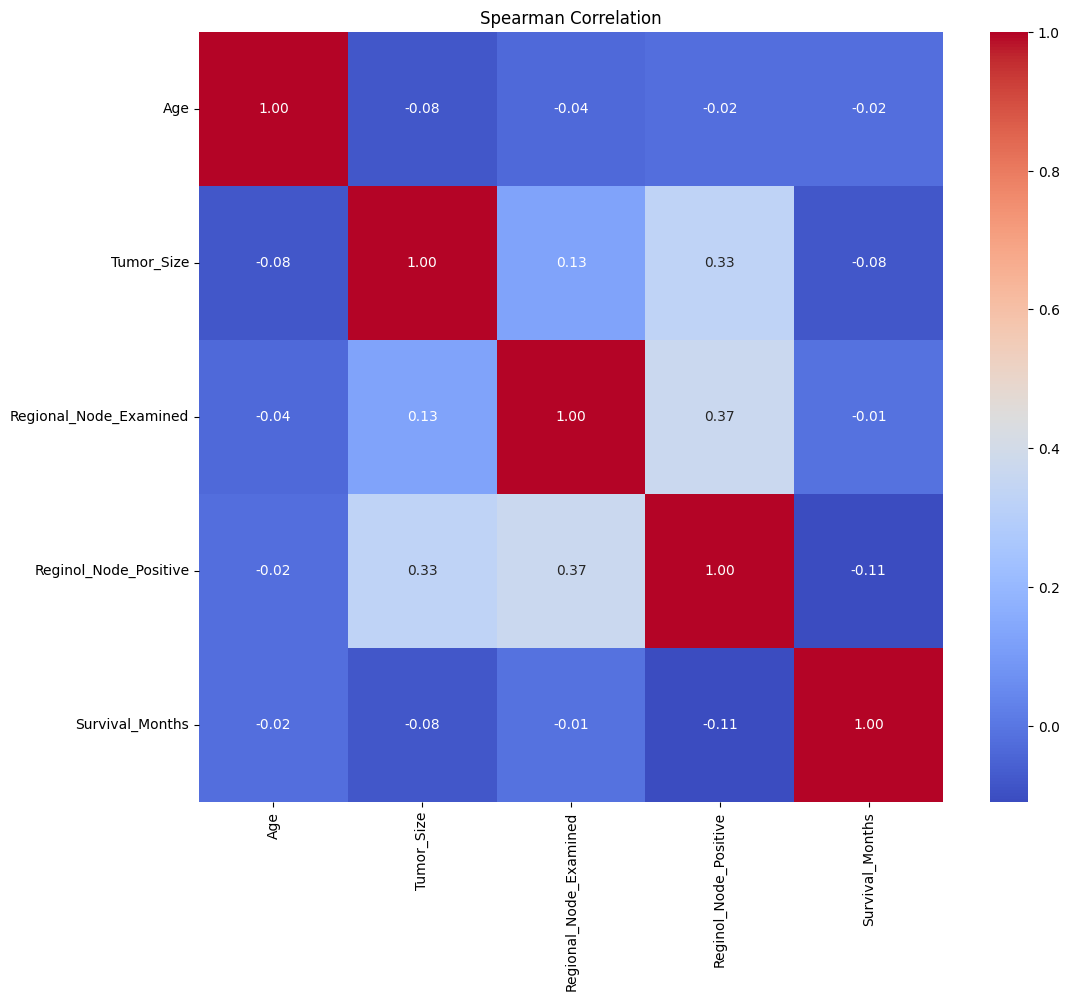

In [ ]:
spearman_corr = numerical_columns.corr(method='spearman')
spearman_corr

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation')
plt.show()

No redundant features found

# Feature Importance
encode data first, explain why I choose some as ordinal data and some not

In [19]:
#ordinal data 
df.columns
#T Stage, N Stage, 6th Stage, differentiate, A Stage, Grade -> later say why 
#df["A Stage"].value_counts()

Index(['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage',
       'differentiate', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Status'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_column' is the column containing categorical data in your DataFrame
label_encoder = LabelEncoder()
df['T_Stage_encoded'] = label_encoder.fit_transform(df['T_Stage'])
df['N_Stage_encoded'] = label_encoder.fit_transform(df['N_Stage'])
df['differentiate_encoded'] = label_encoder.fit_transform(df['differentiate'])
df['A_Stage_encoded'] = label_encoder.fit_transform(df['A_Stage'])
df['Grade_encoded'] = label_encoder.fit_transform(df['Grade'])
df['6th_Stage_encoded'] = label_encoder.fit_transform(df['6th_Stage'])


In [21]:
one_hot_encoded_df = pd.get_dummies(df, columns=['Race', 'Marital_Status', 'Estrogen_Status', 'Progesterone_Status', 'Status'])
one_hot_encoded_df

,Age,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,...,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed,Estrogen_Status_Negative,Estrogen_Status_Positive,Progesterone_Status_Negative,Progesterone_Status_Positive,Status_Alive,Status_Dead
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,24,1,...,True,False,False,False,False,True,False,True,True,False
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,14,5,...,True,False,False,False,False,True,False,True,True,False
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,14,7,...,False,False,False,False,False,True,False,True,True,False
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,2,1,...,True,False,False,False,False,True,False,True,True,False
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,3,1,...,True,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,T1,N1,IIA,Moderately differentiated,2,Regional,9,1,1,...,True,False,False,False,False,True,False,True,True,False
4020,56,T2,N2,IIIA,Moderately differentiated,2,Regional,46,14,8,...,False,False,False,False,False,True,False,True,True,False
4021,68,T2,N1,IIB,Moderately differentiated,2,Regional,22,11,3,...,True,False,False,False,False,True,True,False,True,False
4022,58,T2,N1,IIB,Moderately differentiated,2,Regional,44,11,1,...,False,False,False,False,False,True,False,True,True,False


In [22]:
#not ordinal columns
#Race, marriage status, Estrogen Status, Progesterone Status, Status
one_hot_encoded_df = pd.get_dummies(df, columns=['Race', 'Marital_Status', 'Estrogen_Status', 'Progesterone_Status', 'Status'])
one_hot_encoded_df[['Race_Black', 'Race_Other',
       'Race_White', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Separated', 'Marital_Status_Single ',
       'Marital_Status_Widowed', 'Estrogen_Status_Negative',
       'Estrogen_Status_Positive', 'Progesterone_Status_Negative',
       'Progesterone_Status_Positive', 'Status_Alive', 'Status_Dead']] = one_hot_encoded_df[['Race_Black', 'Race_Other',
       'Race_White', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Separated', 'Marital_Status_Single ',
       'Marital_Status_Widowed', 'Estrogen_Status_Negative',
       'Estrogen_Status_Positive', 'Progesterone_Status_Negative',
       'Progesterone_Status_Positive', 'Status_Alive', 'Status_Dead']].astype(int)
ml_ready_df = one_hot_encoded_df[['Age',
    'Tumor_Size', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'T_Stage_encoded',
       'N_Stage_encoded', 'differentiate_encoded', 'A_Stage_encoded',
       'Grade_encoded', '6th_Stage_encoded', 'Race_Black', 'Race_Other',
       'Race_White', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Separated', 'Marital_Status_Single ',
       'Marital_Status_Widowed',
       'Estrogen_Status_Positive',
       'Progesterone_Status_Positive', 'Status_Alive']].copy()
ml_ready_df

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,T_Stage_encoded,N_Stage_encoded,differentiate_encoded,A_Stage_encoded,Grade_encoded,...,Race_Other,Race_White,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed,Estrogen_Status_Positive,Progesterone_Status_Positive,Status_Alive
0,68,4,24,1,60,0,0,1,1,3,...,0,1,0,1,0,0,0,1,1,1
1,50,35,14,5,62,1,1,0,1,2,...,0,1,0,1,0,0,0,1,1,1
2,58,63,14,7,75,2,2,0,1,2,...,0,1,1,0,0,0,0,1,1,1
3,58,18,2,1,84,0,0,1,1,3,...,0,1,0,1,0,0,0,1,1,1
4,47,41,3,1,50,1,0,1,1,3,...,0,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,9,1,1,49,0,0,0,1,2,...,1,0,0,1,0,0,0,1,1,1
4020,56,46,14,8,69,1,1,0,1,2,...,0,1,1,0,0,0,0,1,1,1
4021,68,22,11,3,69,1,0,0,1,2,...,0,1,0,1,0,0,0,1,0,1
4022,58,44,11,1,72,1,0,0,1,2,...,0,0,1,0,0,0,0,1,1,1


'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'differentiate', 'Grade',
       'A_Stage', 'Tumor_Size', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'T_Stage_encoded',
       'N_Stage_encoded', 'differentiate_encoded', 'A_Stage_encoded',
       'Grade_encoded', '6th_Stage_encoded', 'Race_Black', 'Race_Other',
       'Race_White', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Separated', 'Marital_Status_Single ',
       'Marital_Status_Widowed', 'Estrogen_Status_Negative',
       'Estrogen_Status_Positive', 'Progesterone_Status_Negative',
       'Progesterone_Status_Positive', 'Status_Alive', 'Status_Dead'

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = ml_ready_df.drop(columns=['Status_Alive'])
y = ml_ready_df['Status_Alive']

print(len(X), len(y))
X.columns
y



4024 4024


0       1
1       1
2       1
3       1
4       1
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: Status_Alive, Length: 4024, dtype: int64

In [41]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Train Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X, y)

# Access feature importances
rf_importances = rf_model.feature_importances_
gbm_importances = gbm_model.feature_importances_

# Assuming your features are stored in a DataFrame named 'df'
feature_names = X.columns

# Create DataFrames to store feature importances
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
gbm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_importances})

# Sort the DataFrames by importance values
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
gbm_importance_df = gbm_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance rankings
print("Random Forest Feature Importance:")
print(rf_importance_df)

print("\nGradient Boosting Feature Importance:")
print(gbm_importance_df)

Random Forest Feature Importance:
                         Feature  Importance
4                Survival_Months    0.388620
0                            Age    0.111940
2         Regional_Node_Examined    0.098787
1                     Tumor_Size    0.096788
3          Reginol_Node_Positive    0.071534
10             6th_Stage_encoded    0.031995
5                T_Stage_encoded    0.022300
9                  Grade_encoded    0.022177
20  Progesterone_Status_Positive    0.021898
6                N_Stage_encoded    0.020966
7          differentiate_encoded    0.017299
15        Marital_Status_Married    0.015612
19      Estrogen_Status_Positive    0.015046
14       Marital_Status_Divorced    0.011258
17        Marital_Status_Single     0.010672
13                    Race_White    0.009993
11                    Race_Black    0.009105
12                    Race_Other    0.007715
18        Marital_Status_Widowed    0.007269
16      Marital_Status_Separated    0.004528
8                A_St

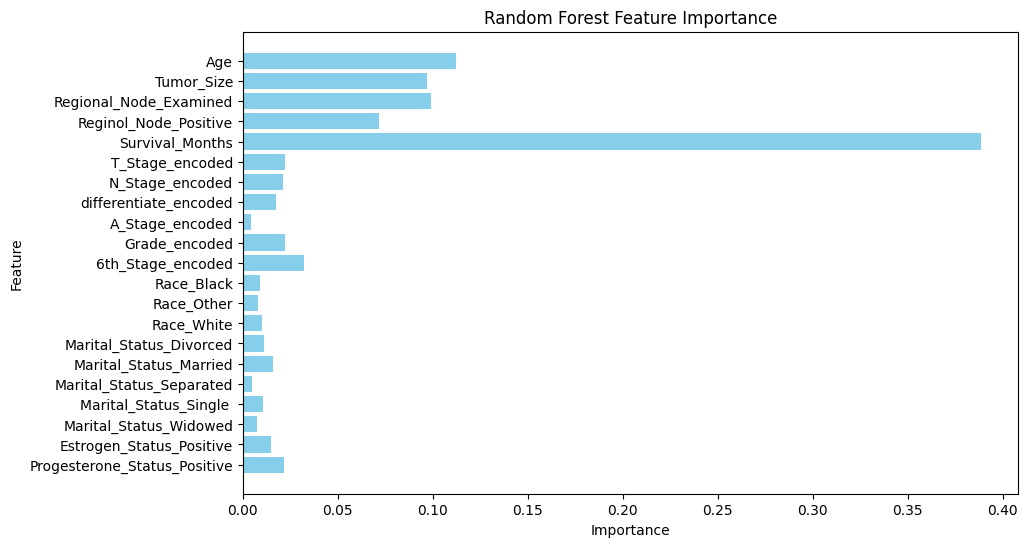

In [42]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, rf_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
#scaling
boolean_numerical_columns = []
for col in X.columns:
    if col in numerical_columns:
        boolean_numerical_columns.append(True)
    else:
        boolean_numerical_columns.append(False)



In [44]:
X_numerical = X.loc[:, boolean_numerical_columns]
X_numerical

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50
...,...,...,...,...,...
4019,62,9,1,1,49
4020,56,46,14,8,69
4021,68,22,11,3,69
4022,58,44,11,1,72


In [45]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical features and transform them
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Replace the original numerical features with the scaled ones
X_scaled = X.copy()
X_scaled.loc[:, boolean_numerical_columns]  = X_numerical_scaled

/var/folders/l4/g438h7v9007346ppbyxys7l40000gq/T/ipykernel_52108/3052959508.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.97435897 0.51282051 0.71794872 ... 0.97435897 0.71794872 0.41025641]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/l4/g438h7v9007346ppbyxys7l40000gq/T/ipykernel_52108/3052959508.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02158273 0.24460432 0.44604317 ... 0.15107914 0.30935252 0.20863309]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/l4/g438h7v9007346ppbyxys7l40000gq/T/ipykernel_52108/3052959508.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.38333333 0.21666667 0.21666667 ... 0.16666667 0.16666667 0.1       ]' ha

In [46]:
X_scaled

,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,T_Stage_encoded,N_Stage_encoded,differentiate_encoded,A_Stage_encoded,Grade_encoded,...,Race_Black,Race_Other,Race_White,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed,Estrogen_Status_Positive,Progesterone_Status_Positive
0,0.974359,0.021583,0.383333,0.000000,0.556604,0,0,1,1,3,...,0,0,1,0,1,0,0,0,1,1
1,0.512821,0.244604,0.216667,0.088889,0.575472,1,1,0,1,2,...,0,0,1,0,1,0,0,0,1,1
2,0.717949,0.446043,0.216667,0.133333,0.698113,2,2,0,1,2,...,0,0,1,1,0,0,0,0,1,1
3,0.717949,0.122302,0.016667,0.000000,0.783019,0,0,1,1,3,...,0,0,1,0,1,0,0,0,1,1
4,0.435897,0.287770,0.033333,0.000000,0.462264,1,0,1,1,3,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.820513,0.057554,0.000000,0.000000,0.452830,0,0,0,1,2,...,0,1,0,0,1,0,0,0,1,1
4020,0.666667,0.323741,0.216667,0.155556,0.641509,1,1,0,1,2,...,0,0,1,1,0,0,0,0,1,1
4021,0.974359,0.151079,0.166667,0.044444,0.641509,1,0,0,1,2,...,0,0,1,0,1,0,0,0,1,0
4022,0.717949,0.309353,0.166667,0.000000,0.669811,1,0,0,1,2,...,1,0,0,1,0,0,0,0,1,1


In [47]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Access feature importances
rf_importances = rf_model.feature_importances_


# Assuming your features are stored in a DataFrame named 'df'
feature_names = X_scaled.columns

# Create DataFrames to store feature importances
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})


# Sort the DataFrames by importance values
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)


# Print feature importance rankings
print("Random Forest Feature Importance:")
print(rf_importance_df)

Random Forest Feature Importance:
                         Feature  Importance
4                Survival_Months    0.388620
0                            Age    0.111940
2         Regional_Node_Examined    0.098787
1                     Tumor_Size    0.096788
3          Reginol_Node_Positive    0.071534
10             6th_Stage_encoded    0.031995
5                T_Stage_encoded    0.022300
9                  Grade_encoded    0.022177
20  Progesterone_Status_Positive    0.021898
6                N_Stage_encoded    0.020966
7          differentiate_encoded    0.017299
15        Marital_Status_Married    0.015612
19      Estrogen_Status_Positive    0.015046
14       Marital_Status_Divorced    0.011258
17        Marital_Status_Single     0.010672
13                    Race_White    0.009993
11                    Race_Black    0.009105
12                    Race_Other    0.007715
18        Marital_Status_Widowed    0.007269
16      Marital_Status_Separated    0.004528
8                A_St

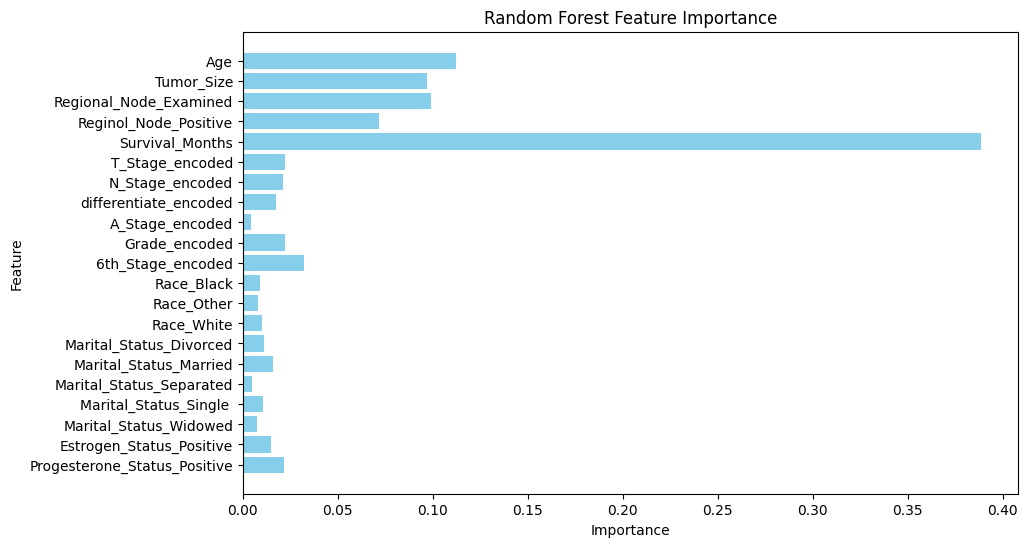

In [48]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, rf_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

feature importance doesn't change when numerical values are scaled or not 
explain why the feature importance is how it is

# Domainknowledge

In [30]:
df['T_Stage'].value_counts()

T_Stage
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

In [31]:
df['T_Stage_encoded'].value_counts()

T_Stage_encoded
1    1786
0    1603
2     533
3     102
Name: count, dtype: int64

In [32]:
df['Tumor_Size'].value_counts()

Tumor_Size
15     271
25     268
30     228
20     211
35     161
      ... 
98       1
88       1
87       1
117      1
67       1
Name: count, Length: 110, dtype: int64

In [33]:
df['N_Stage'].value_counts()

N_Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

In [34]:
df['Reginol_Node_Positive'].value_counts()

Reginol_Node_Positive
1     1522
2      740
3      420
4      261
5      207
6      140
7      108
9       90
8       75
10      61
11      56
12      50
14      41
13      33
16      29
15      26
17      26
19      23
22      16
18      15
21      13
26      10
20      10
23       8
24       8
28       7
27       6
29       6
25       3
33       2
37       2
30       2
32       2
34       2
31       1
46       1
35       1
41       1
Name: count, dtype: int64

# Dataset  Split

train, validate, test
60:20:20

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,...,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status,T_Stage_encoded,N_Stage_encoded,differentiate_encoded,A_Stage_encoded,Grade_encoded,6th_Stage_encoded
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,...,24,1,60,Alive,0,0,1,1,3,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,...,14,5,62,Alive,1,1,0,1,2,2
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,...,14,7,75,Alive,2,2,0,1,2,4
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,...,2,1,84,Alive,0,0,1,1,3,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,...,3,1,50,Alive,1,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,...,1,1,49,Alive,0,0,0,1,2,0
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,...,14,8,69,Alive,1,1,0,1,2,2
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,...,11,3,69,Alive,1,0,0,1,2,1
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,...,11,1,72,Alive,1,0,0,1,2,1


In [ ]:
#train, validate, test in one split, not random
#train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [ ]:
#train, validate, test in one split, random
train, validate, test = np.split(df.sample(frac=1, random_state=1), [int(.6*len(df)), int(.8*len(df))])

In [49]:
from sklearn.model_selection import train_test_split
#train, validate, test in two split, random
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)

In [51]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [52]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

average_method = 'macro'  # or 'micro', 'weighted', or None

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average_method)
recall = recall_score(y_test, y_pred, average=average_method)
f1 = f1_score(y_test, y_pred, average=average_method)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9043478260869565
Precision: 0.8278578353604795
Recall: 0.7008192296272302
F1-Score: 0.7427805511637847


In [54]:
from collections import Counter

occurrences = Counter(y_pred)
occurrences

Counter({1: 744, 0: 61})

In [55]:
y_test.value_counts()

Status_Alive
1    699
0    106
Name: count, dtype: int64

#cross validation split with k-fold?
ideas for algorithms: Logistics regression, Gaussian Naive Bayes Classifier, SVM Classifier, Gradient Boosting Classifier
confusion matrix

logistic regression: Used for binary classification tasks where the target variable has two classes. predict dead or alive?